# Customer Data Analysis

Here, we shall apply all that we have learned about data preprocessing to the customer_data.csv file and then we shall create our first machine learning models.

Before we proceed, it is important to keep in mind that we are following the Machine Learning Process discussed in previous classes.

### Problem Statement

A bank calls on you, a data scientist, to help them analyze some of their customer data. The problem they are having is that they would like to give loans to only people they are sure will not default on the loans.

They would like you to use the power of Machine Learning to create a model that can predict if a customer will default on a loan or not.

The way this is done is that you will predict a certain "Spending score" of several customers. The spending score is a metric that tells the bank whether you are eligible for a loan. If the spending score is above a threshold, then, you are eligible for a loan. If not, you are not eligible for a loan. Once the spending score predicted by your machine learning model is above the identified threshold set by the bank, they go ahead to give out the loan to that customer.

The spending score is the output of your model but what about the input? The input is all the data the bank has about each customer. Data such as gender, occupation sector, income, businessman/employed, age, and so on. are used to make the prediction of the Spending score

### Initial thoughts

The first thoughts to solve this problem are to determine what type of problem this is.

What are we predicting? A continuous variable? A categorical variable?

What Machine Learning type is best to make the prediction? Classification, Regression or Clustering?

What are the possible Machine Learning algorithms to use to perform the classification, regression or clustering?



### Answers to Initial thoughts

- We are predicting a spending score. The spending score can be any value from 1 to 100. These are numeric continuous values. 

- Check out these two links to understand the main types of variables we can have: Continuous, Discrete, Categorical.
(link 1: https://byjus.com/maths/continuous-variable/#:~:text=There%20are%20two%20types%20of%20continuous%20variables%20namely%20interval%20and%20ratio%20variables.)

(link 2:https://statistics.laerd.com/statistical-guides/types-of-variable.php )

- Because we are trying to predict numbers, the Machine Learning type should be a Regression.

- The Machine Learning Algorithms we will use for this regression are:

1. Linear Regression
2. Support Vector Machines
3. Decision Trees
4. Random Forests

- There are other regression algorithms, which will be discussed later.


Now that we have answered the initial thoughts, we can then proceed to applying the Machine Learning Process described above.
 

## Data Preprocessing

In [1]:
#Import the packages: Numpy, Pandas, Matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Import the Data

In [2]:
customer_data = pd.read_csv("Customer_Data.csv") #Importing the Customer dataset that the bank has given us to train our model
test_data = pd.read_excel("new_customers.xlsx") #Importing the new Customers dataset that the bank wants us to predict



#Checking to see if the data was well imported.
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,170,Male,32.0,87,58
1,174,Male,36.0,87,60
2,113,Female,38.0,64,66
3,150,Male,34.0,78,60
4,68,Female,68.0,48,47


### Data Inspection and Cleaning

In [3]:
#Checking the general information about the data

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              188 non-null    int64  
 1   Genre                   188 non-null    object 
 2   Age                     187 non-null    float64
 3   Annual Income (k$)      188 non-null    object 
 4   Spending Score (1-100)  187 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.5+ KB


### Data Issues

- Annual income and Spending score are object instead of integers or float.

- The Age column and Spending score column have missing values

#### Dealing with the null values first:

This is a **key** aspect of cleaning data. Null values should be dealt with first. This is because some pandas methods do not work with null values. Thus, even if you wanted to clean other things but you still have null values, you would not be able to.

In [4]:
#Using .isnull() to ask pandas a question about which columns have null values. This returns True or False.
#Using .sum() to sum up all places where it is "True" that there is a null value


customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       1
Annual Income (k$)        0
Spending Score (1-100)    1
dtype: int64

In [5]:
#Using .isnull() to again ask pandas if there are null values in the Age column. This returns True or False

#We place the result of the .isnull() into a .loc[] method so that pandas can retrieve only the rows where it is True that there
#is a null value

customer_data.loc[customer_data["Age"].isnull()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
186,300,Male,NaN,55,NaN


**Row 186** is missing values in the Age and Spending Score columns. Thus, we should drop that row entirely

In [6]:
#Using the .drop() method to drop the row specified.

customer_data.drop([186], inplace = True)

After dropping that row, we can check if there are still any missing values in the data

In [7]:
#Using .isnull() and .sum() to add up all the existing null values in each column

customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Solving Annual Income Issues:

The issue here is that the column showed up as "object" (which means "string" in pandas) instead of "integer" or "float".

Therefore, we need to figure out where the column contains letters of the alphabet instead of numbers

In [8]:
#Using the .str method to be able to access the annual income column like a string. After using the .str method, we can now
#manipulate the values in the annual income column like a normal python string.

#.isalpha() is a normal python string method that is used to check if the value within the quotation marks ("" or '') is a 
#letter of the alphabet or not.

customer_data.loc[customer_data["Annual Income (k$)"].str.isalpha()]


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
140,159,78,34.0,Male,48
162,209,Female,48.0,x,0


**Row 140**: Here we can see that Male is in the Annual income column while 78 is in the Gender column. To fix this, we simply need to switch these two values so that Male is now in the Gender column and 78 is in the Annual income column

**Row 162**: Here, we see that the letter "x" is written under the Annual Income column. There is no way of inferring the value
Therefore, we can drop this row

In [9]:
#DEALING WITH ROW 140

#Using the .at[] method to alter the values at the exact row and column specified.

customer_data.at[140, "Genre"] = "Male"

customer_data.at[140, "Annual Income (k$)"] = 78

In [10]:
#Using the .loc[] method to confirm the new values in the row 140

customer_data.loc[140, :]

CustomerID                 159
Genre                     Male
Age                       34.0
Annual Income (k$)          78
Spending Score (1-100)      48
Name: 140, dtype: object

In [11]:
#DEALING WITH ROW 162

#Using .drop() to remove the faulty row 162 from the dataset

customer_data.drop([162], inplace = True)

In [12]:
#Using .loc[] to specify some rows before and after row 162 so that we can confirm that row 162 has been removed.

customer_data.iloc[160:164,:]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
160,205,Male,-5.0,20,50
161,207,Female,2600.0,67,83
163,145,Male,25.0,77,42
164,139,Male,19.0,74,34


In [13]:
#Using .info() to check the general information about the data after some cleaning has been done.

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 187
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              186 non-null    int64  
 1   Genre                   186 non-null    object 
 2   Age                     186 non-null    float64
 3   Annual Income (k$)      186 non-null    object 
 4   Spending Score (1-100)  186 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.7+ KB


### Data Issues


- The Annual Income column is still an "object" column despite performing the cleaning on the column

- The Spending score column is still an "object" column as well

#### Solving the Annual Income Issues:

In [14]:
#Using .astype(int) to specify to pandas that we want the Annual income column as an integer column not string or object column

customer_data["Annual Income (k$)"] =customer_data["Annual Income (k$)"].astype(int)

In [15]:
customer_data["Spending Score (1-100)"].str.isalpha()

0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
187    False
Name: Spending Score (1-100), Length: 186, dtype: bool

#### Solving Spending score issues:


We have noticed that Spending score is an object. This implies that there must be a value in the Spending score column that
is not a numerical value.

Again, we can find this value using the similar code like we used earlier by using the .str.isalpha() method chain.

In [16]:
#Using .str to access the Spending Score column like a normal python string and asking python if any of the values in the
#Spending score column is a letter in the alphabet using the .alpha() method.

customer_data[customer_data["Spending Score (1-100)"].str.isalpha()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
6,65,26,63.0,48,Male


The Spending Score column has a value of "Male" while the Gender column has a 26 in it. 

This simply implies that we should switch these two values because it is obviously a typist error.

In [17]:
#Using the .at[] method to change the value at the specified row number and column name to the values we want.

customer_data.at[6, "Genre"] = "Male"

customer_data.at[6, "Spending Score (1-100)"] = 26

customer_data["Spending Score (1-100)"] = customer_data["Spending Score (1-100)"].astype(int)

In [18]:
#Again, we use .info() to check if our data is in the right format.

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 187
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              186 non-null    int64  
 1   Genre                   186 non-null    object 
 2   Age                     186 non-null    float64
 3   Annual Income (k$)      186 non-null    int32  
 4   Spending Score (1-100)  186 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 11.3+ KB


In [19]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,170,Male,32.0,87,58
1,174,Male,36.0,87,60
2,113,Female,38.0,64,66
3,150,Male,34.0,78,60
4,68,Female,68.0,48,47


The format of our data looks good. There are no null values and all the datatypes are correct for the columns being represented


Next, we can use the .describe() method to view the statistical summary of the data. This helps us to find things like **outliers**, **data skew**, and **invalid values like negative ages**

In [20]:
#Using .describe() to produce a statistical summary of the dataset

customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,186.000000,186.000000,186.000000,186.000000
mean,102.580645,51.629032,60.290323,73.053763
std,60.249360,188.463566,26.618255,366.405767
min,2.000000,-32.000000,15.000000,2.000000
25%,51.250000,28.000000,40.000000,28.250000
50%,101.500000,35.500000,60.500000,48.000000
75%,151.750000,48.000000,77.750000,66.000000
max,301.000000,2600.000000,137.000000,5030.000000


### Data Issues:


- Negative age of -32 as the minimum age in the dataset. This is probably 32 and the typist mistakenly added the negative sign

- Overly high age value. The maximum age is 2600. Another typist error that probably is 26

- Overly high spending score of 5030. This cannot really be categorized and inferred so we can drop the row with that value.

#### Solving Age issues:

In [21]:
#Find where the age is negative:

#We use the table_name[column_name]< 0 to find where the column Age has a value less than 0. Since the less than (<) sign asks
#pandas a question, we should expect it to return True or False for each row.
#We use the .loc[] method to find where the row values are True that the customer age is actually less than 0.

customer_data.loc[customer_data["Age"] < 0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
143,198,Male,-32.0,126,67
160,205,Male,-5.0,20,50


**Row 143**: This row contains age -32 that we saw in the statistical summary above. The negative sign just needs to be removed

**Row 160**: This row contains age -5. It is not entirely clear how this error got into the dataset so we can just remove the row entirely

In [22]:
#Using the .at[] method to specify the exact row number and column name to adjust the value we want.

#Using the .drop() method to remove the row 160 as discussed above. Inplace = True just tells pandas to drop the row 160
# without us having to equate the result to itself.

customer_data.at[143, "Age"] = 32

customer_data.drop([160], inplace = True)

In [23]:
#Checking the rows for where age is less than 0 again.

customer_data.loc[customer_data["Age"] < 0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [24]:
#Find the large age(s)

customer_data.loc[customer_data["Age"] > 120]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
161,207,Female,2600.0,67,83


In [25]:
customer_data.at[161, "Age"] = 26

#### Solving Spending score issues:

In [26]:
#Using the .loc[] method to locate where it is True that Spending score is greater than 100

customer_data.loc[customer_data["Spending Score (1-100)"] > 100]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
187,301,Female,20.0,17,5030


In [27]:
#Using the .drop() method to drop that row 187

customer_data.drop([187], inplace = True)

In [28]:
#Checking to see if there are any more values of Spending score greater than 100

customer_data.loc[customer_data["Spending Score (1-100)"] > 100]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


Now that we have sorted out those issues, we can perform the statistical summary of our data again

In [29]:
#Performing the statistical summary again
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,184.000000,184.000000,184.000000,184.000000
mean,100.945652,38.467391,60.744565,46.239130
std,58.262430,13.769731,26.399929,26.927496
min,2.000000,18.000000,15.000000,2.000000
25%,50.750000,28.750000,41.500000,28.000000
50%,100.500000,35.500000,61.500000,48.000000
75%,150.250000,48.000000,78.000000,66.000000
max,207.000000,70.000000,137.000000,93.000000


In [30]:
#This statistical summary contains an argument called include. This is used to add categorical variables which would not
#have means, medians, and so on like numerical values would

customer_data.describe(include = "all")

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,184.000000,184,184.000000,184.000000,184.000000
unique,NaN,4,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,NaN
mean,100.945652,NaN,38.467391,60.744565,46.239130
std,58.262430,NaN,13.769731,26.399929,26.927496
min,2.000000,NaN,18.000000,15.000000,2.000000
25%,50.750000,NaN,28.750000,41.500000,28.000000
50%,100.500000,NaN,35.500000,61.500000,48.000000
75%,150.250000,NaN,48.000000,78.000000,66.000000


### Data Issues:


- Under the Gender column, we observe that there are 4 unique values. Gender is either Male or Female. This implies that there must be a problem with that column.

- Also, the Gender column is misspelled as "Genre"

#### Solving the Gender issues:

In [31]:
#Using value_counts to find the total number of times a particular column value is used.

#In this case, Female is used 105 times in the Gender column
#Male is used 78 times in the Gender column
#Fem and Mole are both used once in the Gender column

customer_data["Genre"].value_counts()

Female    104
Male       78
Fem         1
Mole        1
Name: Genre, dtype: int64

In [32]:
#Using the .replace() method to replace Mole with Male and Fem with Female


customer_data["Genre"] = customer_data["Genre"].replace(["Mole", "Fem"], ["Male", "Female"])

In [33]:
#Using value_counts again to check the number of column values in the Gender column.

customer_data["Genre"].value_counts()

Female    105
Male       79
Name: Genre, dtype: int64

In [34]:
#Changing the "Genre" column name to "Gender" using the .rename() method

customer_data = customer_data.rename(columns = {"Genre": "Gender"})

test_data = test_data.rename(columns = {"Genre": "Gender"})

*Note: The same renaming must be done to the test_data that the bank gave us so that the column names of both datasets can be uniform. This also aids our analysis as we do not want to refer to two different column names that refer to the same thing*

In [35]:
test_data["Gender"].value_counts()

Male      9
Female    8
Name: Gender, dtype: int64

In [36]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              184 non-null    int64  
 1   Gender                  184 non-null    object 
 2   Age                     184 non-null    float64
 3   Annual Income (k$)      184 non-null    int32  
 4   Spending Score (1-100)  184 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,184.000000,184.000000,184.000000,184.000000
mean,100.945652,38.467391,60.744565,46.239130
std,58.262430,13.769731,26.399929,26.927496
min,2.000000,18.000000,15.000000,2.000000
25%,50.750000,28.750000,41.500000,28.000000
50%,100.500000,35.500000,61.500000,48.000000
75%,150.250000,48.000000,78.000000,66.000000
max,207.000000,70.000000,137.000000,93.000000


In [38]:
customer_data.describe(include = "all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,184.000000,184,184.000000,184.000000,184.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,105,NaN,NaN,NaN
mean,100.945652,NaN,38.467391,60.744565,46.239130
std,58.262430,NaN,13.769731,26.399929,26.927496
min,2.000000,NaN,18.000000,15.000000,2.000000
25%,50.750000,NaN,28.750000,41.500000,28.000000
50%,100.500000,NaN,35.500000,61.500000,48.000000
75%,150.250000,NaN,48.000000,78.000000,66.000000


With this step, we have almost completed the entire data preprocessing process. The process entails loading the dataset and the relevant packages, which we have done; cleaning the dataset in a recursive manner, which we have done; now, all that is left is to **convert all the columns to numbers.**

### Convert all columns to numbers:


There are a number of ways to convert columns to numbers and the use of some depends on the particular scenario.

For this project, we shall use the LabelEncoder class of the Pandas library.

The LabelEncoder class takes categorical columns like the Gender, and converts its values to 0, 1, 2, 3... depending on how many unique values there are in the column.

For example, Gender has only two unique values: Male and Female. This implies that LabelEncoder will convert them to 0s and 1s.

The way LabelEncoder works is given below:

- Create the LabelEncoder object from the LabelEncoder class.

- Fit-Transform the column in the training set using the LabelEncoder object we created earlier. In the Fit process, the  LabelEncoder object is learning the number unique values in the Gender column. After knowing what they are, the Gender column values are Transformed into series of 0s, 1s, and so on.

- Transform the column in the test data using the LabelEncoder object we created. DO NOT USE FIT TRANSFORM ON THE TEST SET.

The only non-numeric column we have is the "Gender" column

In [39]:
#Importing the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

#Creating the LabelEncoder Object fromt the LabelEncoder class. The LabelEncoder object here is named "le"
le = LabelEncoder()


#Fit-Transforming the Gender column of the Training Set
customer_data["Gender"] = le.fit_transform(customer_data["Gender"])

#Transform the Gender column of the Test set
test_data["Gender"] = le.transform(test_data["Gender"])

In [40]:
customer_data["Gender"].value_counts()

0    105
1     79
Name: Gender, dtype: int64

In [41]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,170,1,32.0,87,58
1,174,1,36.0,87,60
2,113,0,38.0,64,66
3,150,1,34.0,78,60
4,68,0,68.0,48,47


In [42]:
test_data.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,161,0,56,79
1,156,0,27,78
2,165,1,50,85
3,117,0,63,65
4,180,1,35,93


The preprocessing steps are complete. Now we can proceed to split our dataset into train and test splits.

Remember what we have: We have a cleaned Training set and a Test Data.

In real-life, we do not know correct spending score the values in the Test Data that the bank has given us. These are the spending scores that the bank would like us as Data Scientists to predict.

Thus, it is imperative for us to create a test set from the Training set we have. This way, we can test our model's predictive power on our test data first before proceeding to the real-world data, which is the Test_dat.

In [43]:
#Saving the dataset.

customer_data.to_csv("cleaned_customer_data.csv", index = False)

In [44]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,170,1,32.0,87,58
1,174,1,36.0,87,60
2,113,0,38.0,64,66
3,150,1,34.0,78,60
4,68,0,68.0,48,47


In [45]:
#Creating Input and Output. This is done using the .iloc[] method.

#X represents the input values of: Age, Annual Income, and Gender.

#Y represents the output value of Spending score.

#(Note: We are still dealing with only the Training set)

X = customer_data.iloc[:,0:-1]

Y = customer_data.iloc[:, -1]

In [46]:
X

,CustomerID,Gender,Age,Annual Income (k$)
0,170,1,32.0,87
1,174,1,36.0,87
2,113,0,38.0,64
3,150,1,34.0,78
4,68,0,68.0,48
...,...,...,...,...
181,193,1,33.0,113
182,151,1,43.0,78
183,30,0,23.0,29
184,88,0,22.0,57


**Train_test_split** helps us to divide the input X into x_train, and x_test for our personal evaluation of the model we will create and it also helps us to create y_train and y_test from the output values of Y

**stratify** just tells pandas to randomize the dataset based on the values of a particular column

**test_size** tells pandas how large you want your test size to be relative to the training set of your customer_data. A test_size of 0.15 chosen here is 15% of the entire dataset but if the dataset were sufficiently large enough, we could opt for the more traditionaly 70-30 split of the training and test set.

In [47]:
#Creating the Training and Test sets

#Importing the train_test_split module
from sklearn.model_selection import train_test_split

#Applying the train_test_split to split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = X["Gender"], test_size = 0.15, random_state = 0)

In [48]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,170,1,32.0,87,58
1,174,1,36.0,87,60
2,113,0,38.0,64,66
3,150,1,34.0,78,60
4,68,0,68.0,48,47


# Data Modeling

The values we are trying to predict are the spending score of the customers. This is a continuous variable. As a result, the problem we are faced with is a **Regression** problem.

Thus, we can apply any of the folloing regression models to solve the problem:

- Linear Regression

- Support Vector Regression

- Decision Trees Regression

- Random Forest Regression

Previously, we established that Data Modelling entails:

1. Model Building
2. Training the Model
3. Making predictions.


However, there are some other intermediate steps we should take in order to have very good interpretation of what our machine learning algorithms are doing.

During Model Building and Training (i.e. steps 1 and 2), we usually perform the following operations:

- Import the Machine Learning Algorithm class to use
- Create an object of the machine learning algorithm class
- Fit the machine learning algorithm on the training data. This is where the machine learning model is trained.
- Score how well the machine learning algorithm did on the training set


During step 3 (i.e. Making Predictions), we simply tell the machine learining algorithm to predict the test set output.

### Building the Models


This process usually takes the following steps:

- Import the machine learning algorithm class from sklearn

- Creating an object of the machine learning algorithm class

- Fit the machine learning algorithm to the train data

- Score how well the machine learning algorithm did on the training data

- Score how well the machine learning algorithm did on the test data and compare with the above step

- Use the trained or fitted machine learning algorithm to predict the test data

#### Model 1: Linear Regression

Check out sklearn's page on linear regression examples: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [49]:
x_train

,CustomerID,Gender,Age,Annual Income (k$)
55,4,0,23.0,16
2,113,0,38.0,64
99,153,0,44.0,78
17,199,1,32.0,137
23,140,0,35.0,74
...,...,...,...,...
166,122,0,38.0,67
146,131,1,47.0,71
103,56,1,47.0,43
49,7,0,35.0,18


#### Build and Train the model

In [50]:
#Import the machine learning algorithm class
from sklearn.linear_model import LinearRegression

#Create an object of the machine learning algorithm class
lr = LinearRegression()

#Fit the machine learning algorithm on the data
lr.fit(x_train.iloc[:, 1:], y_train)

#Score how well the machine learning algorithm did on the training set
lr.score(x_train.iloc[:, 1:], y_train)

#Make a prediction of the test set using the trained machine learning algorithm
y_pred = lr.predict(x_test.iloc[:, 1:])

In [51]:
#Viewing what the machine learning model has predicted
y_pred

array([50.45781895, 33.87547353, 34.9850271 , 45.43922817, 24.16198263,
       49.26050708, 31.7667411 , 58.20029467, 34.33207523, 84.85103197,
       55.32475007, 11.74892596, 45.03258542, 56.23098226, 34.27344231,
       10.70149093, 63.88221407, 34.83515027, 17.28793974, 35.43814319,
       74.43114465, 47.44455711, 14.46413692, 27.64222293, 63.67718992,
       55.78832297, 41.3025504 , 73.44063977])

In [52]:
#These are the test values that the machine learning algorithm is trying to predict
y_test.values

array([83, 31, 47, 60,  2, 57, 64, 58, 38, 65, 26,  7, 83, 82, 14,  8, 81,
       17, 33, 33,  2, 81,  2, 39, 83, 40, 63, 54])

#### Evaluate the model

1. We shall evaluate our model **by comparing the tables of predictions with the table of test values.**


2. We shall also use a number of evaluation metrics to see how far or how close the predictions of our machine learning models were to the actual values.The metrics we shall use here are the **R-squared (r2_score)** and the **mean_squared_error**

> **R-Squared**: The valid values of this metric range from 0 to 1. So if we get anything outside this range, there is something wrong.
The closer the r-squared of our model is to 1, the better it is and the closer it is to 0, the worse it is.


> **mean_squared_error**: This gives the distance or seperation or error that exists between our prediction and the actual values. We always want this error to be as close to 0 as possible.


3. Lastly, we would evaluate the model using **graphs.**

### Using Metrics

In [53]:
#Importing the evaluation metrics

from sklearn.metrics import r2_score, mean_squared_error

In [54]:
#Using the r-squared on the y_train (The actual values) and y_pred (The machine Learning's prediction)

lr.score(x_train.iloc[:, 1:], y_train)

0.36664858860799676

In [55]:
#Using the r-squared on the y_test (The actual values) and y_pred (The machine learning's prediction)

r2_score(y_test, y_pred)

0.24881093137195753

In [56]:
#Using the mean squared error metric on the y_test (The actual values) and y_pred (The machine learning's prediction)

mean_squared_error(y_test, y_pred)

564.9813711966109

### Using Tables

In [57]:
#Using pd.DataFrame to create a dataframe that contains the machine learning predictions. We also give the dataframe a 
#column name of "Predictions"

pred_vals_df = pd.DataFrame(y_pred, columns = ["Predictions"], index = y_test.index)
pred_vals_df

,Predictions
47,50.457819
78,33.875474
151,34.985027
24,45.439228
83,24.161983
156,49.260507
20,31.766741
0,58.200295
104,34.332075
119,84.851032


To get a better understanding of how well our model is doing, we can combine the machine learning model's prediction along with the actual values into 1 dataframe. This way, we can visually compare the vaues and see how well the model has performed.

(*Note: This is not a required step. It is only for better understanding of what is going on*)

In [58]:
#Using pd.concat() to bring together the machine learning algorithm's prediction dataframe created above and the 
#actual values dataframe, y_test

combined_result = pd.concat([y_test, pred_vals_df], axis = 1)
combined_result

,Spending Score (1-100),Predictions
47,83,50.457819
78,31,33.875474
151,47,34.985027
24,60,45.439228
83,2,24.161983
156,57,49.260507
20,64,31.766741
0,58,58.200295
104,38,34.332075
119,65,84.851032


### Using Graphs

In [59]:
y_train_pred = lr.predict(x_train.iloc[:, 1:])
y_test_pred = lr.predict(x_test.iloc[:, 1:])

plot_data = pd.DataFrame({"Training_Predictions": y_train_pred, "Spending Score (1-100)": y_train.values,
             "Annual Income (k$)": x_train["Annual Income (k$)"].values}, index = y_train.index)

test_plot_data = pd.DataFrame({"Test_Predictions": y_test_pred, "Spending Score (1-100)": y_test,
                              "Annual Income (k$)": x_test["Annual Income (k$)"].values}, index = y_test.index)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

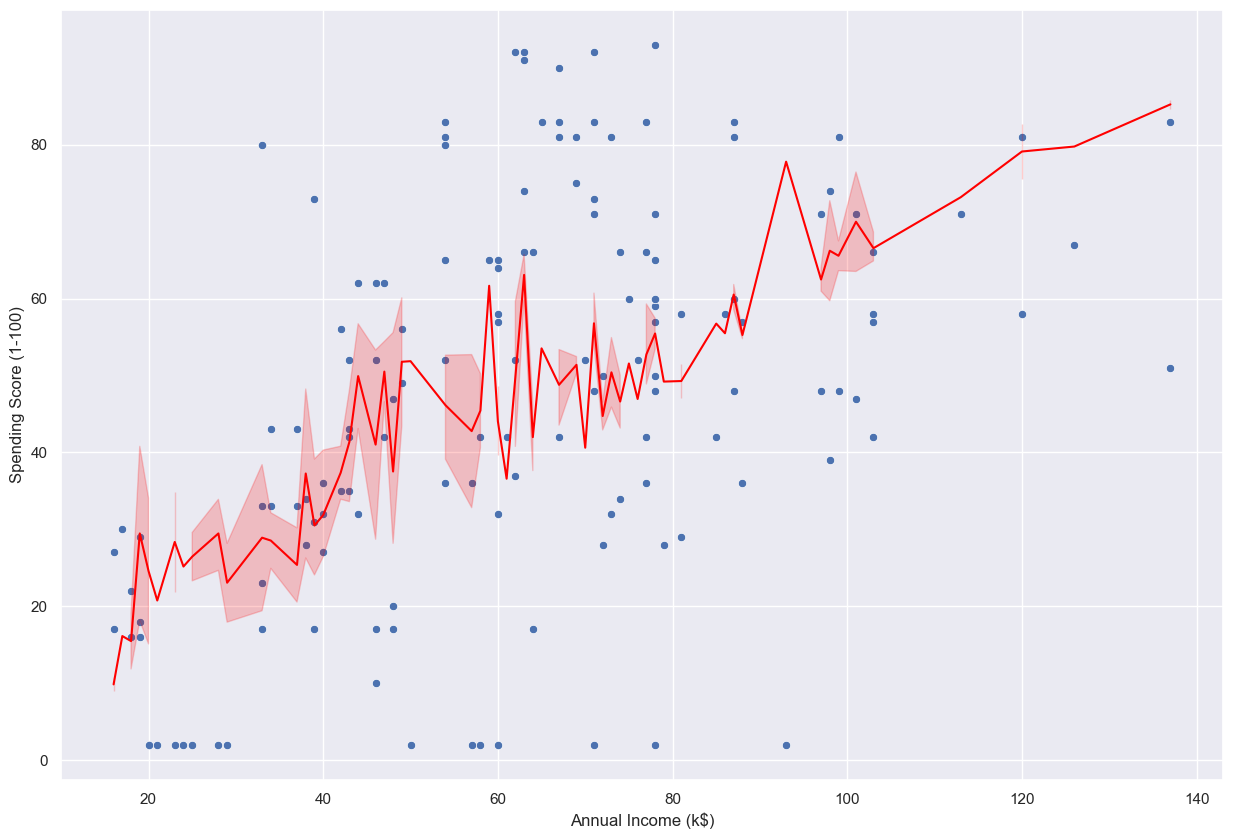

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))


sns.scatterplot(data = plot_data, x ="Annual Income (k$)", y = "Spending Score (1-100)" )
sns.lineplot(data = plot_data, x ="Annual Income (k$)", y = "Training_Predictions", color = "red")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

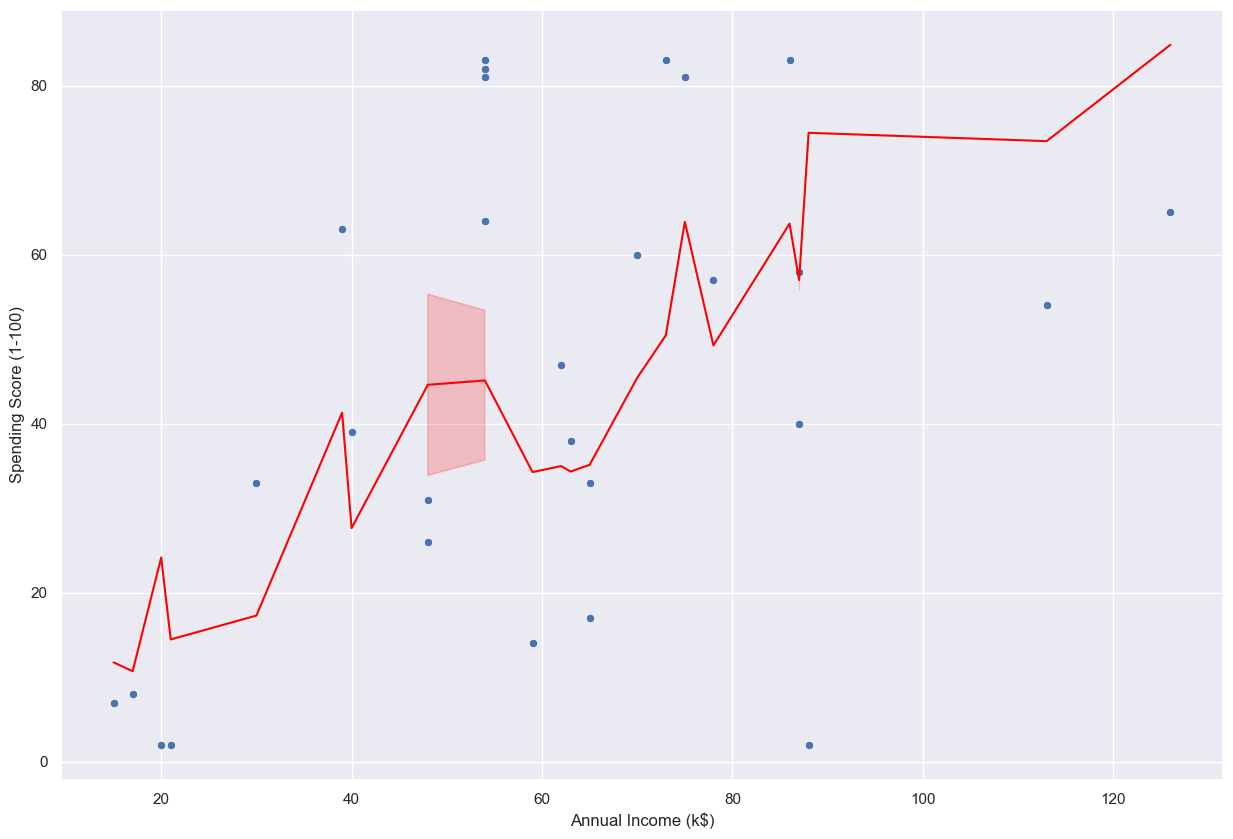

In [61]:
plt.figure(figsize = (15,10))


sns.scatterplot(data = test_plot_data, x ="Annual Income (k$)", y = "Spending Score (1-100)" )
sns.lineplot(data = test_plot_data, x ="Annual Income (k$)", y = "Test_Predictions", color = "red")

Now that we are done with this, we can move on to other algorithms and perform the exact same steps for uniformity of analysis

#### Model 2: Support Vector Regression

In [62]:
#Import the machine learning algorithm class
from sklearn.svm import SVR

#Creating an object of the machine learning algorithm class
svr = SVR()

#Fitting/Training our model to the Training Data
svr.fit(x_train.iloc[:, 1:], y_train)

#Making predictions on our test_data
y_pred = svr.predict(x_test.iloc[:, 1:])


#Scoring the model performance on the training data
svr.score(x_train.iloc[:, 1:], y_train)

0.3378342191139232

### Evaluation

### Using Metrics

In [63]:
#Scoring the model performance on the test data.

r2_score(y_test, y_pred)

0.29998307163088545

In [64]:
#Finding the mean squared error

mean_squared_error(y_test, y_pred)

526.4939820984741

### Using Tables

In [65]:
#Creating a Dataframe for our model's prediction for the test set

pred_vals_df = pd.DataFrame(y_pred, columns = ["Predictions"], index = y_test.index)
pred_vals_df

,Predictions
47,52.543343
78,40.264940
151,44.060835
24,51.050115
83,29.673568
156,53.415304
20,40.787368
0,55.957821
104,43.887777
119,54.163814


In [66]:
#Combining the result of the prediction and the actual values into one dataframe using pd.concat()

combined_result = pd.concat([y_test, pred_vals_df], axis = 1)
combined_result

,Spending Score (1-100),Predictions
47,83,52.543343
78,31,40.264940
151,47,44.060835
24,60,51.050115
83,2,29.673568
156,57,53.415304
20,64,40.787368
0,58,55.957821
104,38,43.887777
119,65,54.163814


### using Graphs

In [67]:
y_train_pred = svr.predict(x_train.iloc[:, 1:])
y_test_pred = svr.predict(x_test.iloc[:, 1:])

plot_data = pd.DataFrame({"Training_Predictions": y_train_pred, "Spending Score (1-100)": y_train.values,
             "Annual Income (k$)": x_train["Annual Income (k$)"].values}, index = y_train.index)

test_plot_data = pd.DataFrame({"Test_Predictions": y_test_pred, "Spending Score (1-100)": y_test,
                              "Annual Income (k$)": x_test["Annual Income (k$)"].values}, index = y_test.index)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

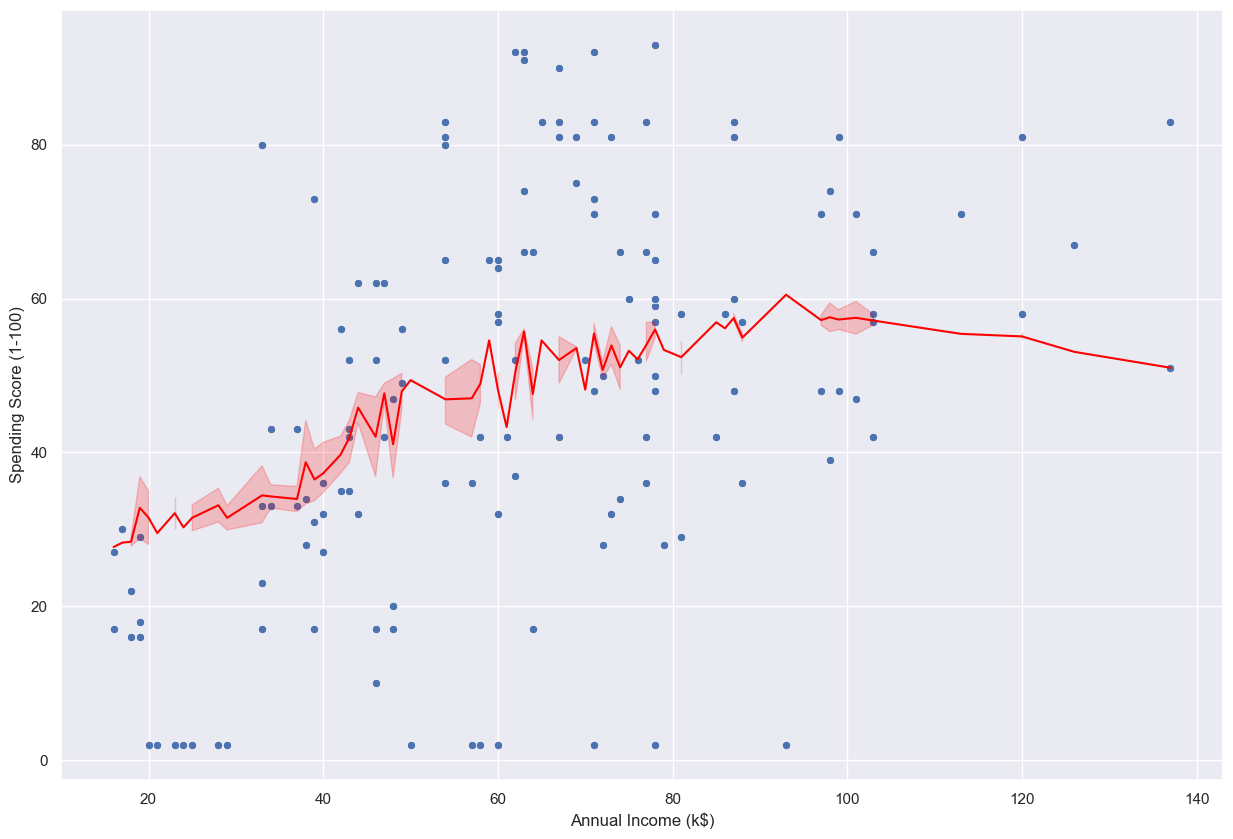

In [68]:
plt.figure(figsize = (15,10))


sns.scatterplot(data = plot_data, x ="Annual Income (k$)", y = "Spending Score (1-100)" )
sns.lineplot(data = plot_data, x ="Annual Income (k$)", y = "Training_Predictions", color = "red")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

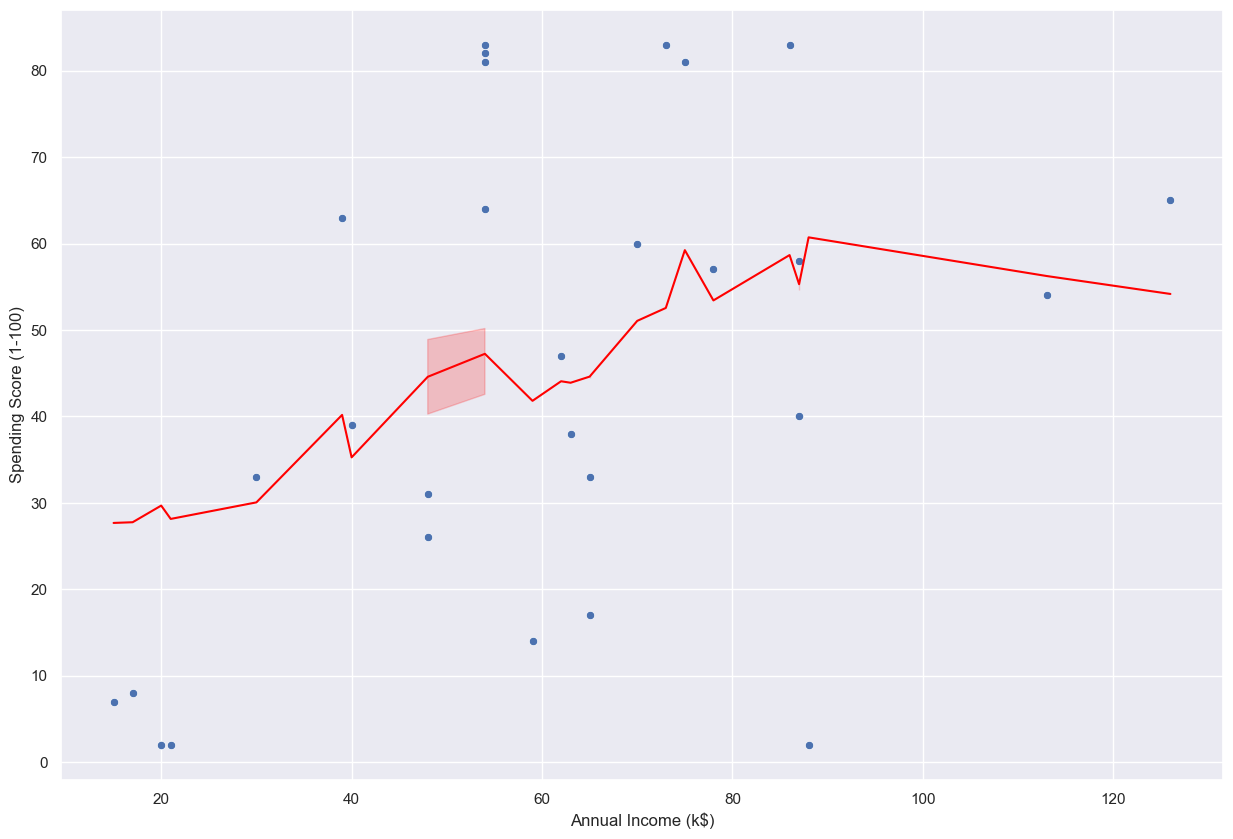

In [69]:
plt.figure(figsize = (15,10))


sns.scatterplot(data = test_plot_data, x ="Annual Income (k$)", y = "Spending Score (1-100)" )
sns.lineplot(data = test_plot_data, x ="Annual Income (k$)", y = "Test_Predictions", color = "red")

#### Model 3: Decision Trees

In [70]:
#Import the machine learning algorithm class
from sklearn.tree import DecisionTreeRegressor

#Import the tree module from the sklearn library. The tree module is used to produce pictorial view of decision trees.
from sklearn import tree

#Creating an object of the machine learning algorithm class
dt = DecisionTreeRegressor()

#Fit the machine learning algorithm object on the training data.
dt.fit(x_train.iloc[:, 1:], y_train)

#Make predictions on the test set using the trained machine learning algorithm.
y_pred = dt.predict(x_test.iloc[:, 1:])

#Score the performance of the machine learning algorithm on the training set.
dt.score(x_train.iloc[:, 1:], y_train)

0.9969836586977696

### Evaluation

### Using Metrics

In [71]:
#Score the performance of the machine learning algorithm on the test set.

r2_score(y_test, y_pred)

0.3353989339601363

In [72]:
#Calculate the mean squared error

mean_squared_error(y_test, y_pred)

499.85714285714283

**The next piece of code is unnecessary for the scope of this course**

But if you must know, it is a code that generates the actual decision tree that the decision tree machine learning algorithm
is using to solve the problem.

plt.figure is just telling pandas how large the length and width of the decision tree should be. That is, how much space on the jupyter notebook that the decision tree must take

"_ = " in python is used when we don't really care about the variable. Normal variable assignment in python is something like:

x = tree.plot_tree. But because x would not be used after this assignment, it makes sense to use a throwaway variable like "_".

**tree.plot_tree** is simply what is used to actually carry out the creation of the decision tree picture. It takes in the name of the decision tree object (dt). It also takes in the feature names: age, annual income, gender. It takes the name of the column we are trying to predict.

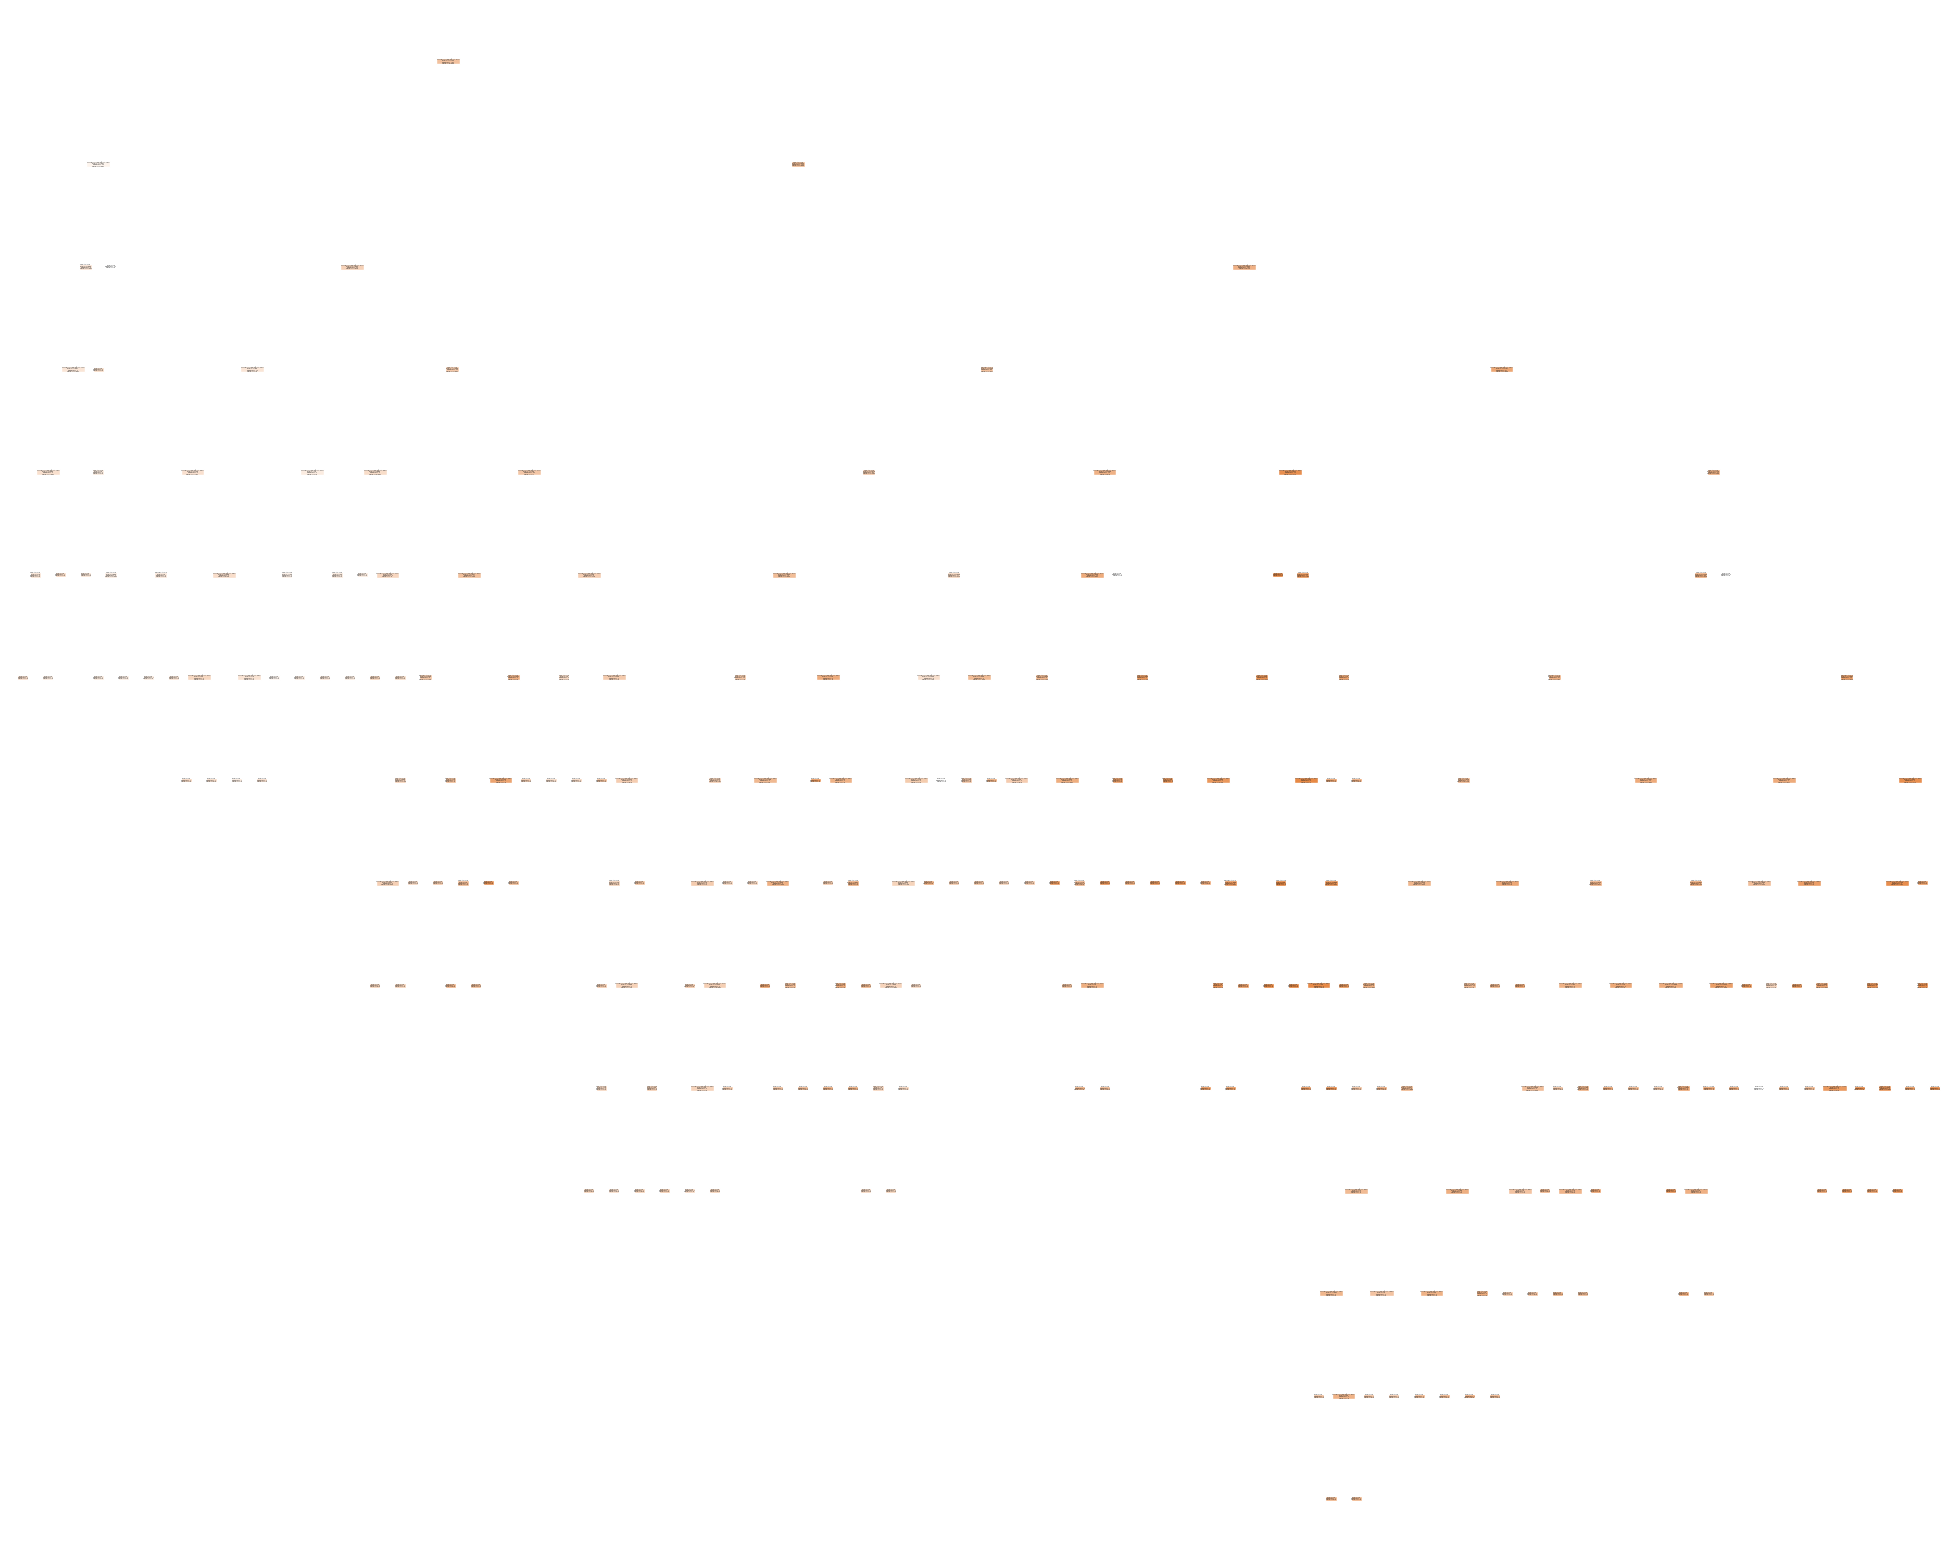

In [73]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names= X.iloc[:,1:].columns,  
                   class_names= Y.name,
                   filled=True)

### Using Tables

In [74]:
pred_vals_df = pd.DataFrame(y_pred, columns = ["Predictions"], index = y_test.index)
pred_vals_df

,Predictions
47,48.0
78,43.0
151,37.0
24,83.0
83,2.0
156,50.0
20,36.0
0,48.0
104,17.0
119,81.0


In [75]:
combined_result = pd.concat([y_test, pred_vals_df], axis = 1)
combined_result

,Spending Score (1-100),Predictions
47,83,48.0
78,31,43.0
151,47,37.0
24,60,83.0
83,2,2.0
156,57,50.0
20,64,36.0
0,58,48.0
104,38,17.0
119,65,81.0


In [76]:
y_test_pred

array([52.54334281, 40.26493993, 44.06083512, 51.05011529, 29.67356767,
       53.41530388, 40.7873676 , 55.95782097, 43.8877771 , 54.16381392,
       48.8917566 , 27.66740628, 47.83818855, 51.31529048, 41.7974354 ,
       27.74816311, 59.23168898, 44.44185486, 30.04567632, 44.75502232,
       60.71336236, 49.00811004, 28.13156676, 35.2557443 , 58.6617178 ,
       54.62955641, 40.1683296 , 56.23935614])

### Using Graphs

In [77]:
y_train_pred = dt.predict(x_train.iloc[:, 1:])
y_test_pred = dt.predict(x_test.iloc[:, 1:])

plot_data = pd.DataFrame({"Training_Predictions": y_train_pred, "Spending Score (1-100)": y_train.values,
             "Annual Income (k$)": x_train["Annual Income (k$)"].values}, index = y_train.index)

test_plot_data = pd.DataFrame({"Test_Predictions": y_test_pred, "Spending Score (1-100)": y_test,
                              "Annual Income (k$)": x_test["Annual Income (k$)"].values}, index = y_test.index)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

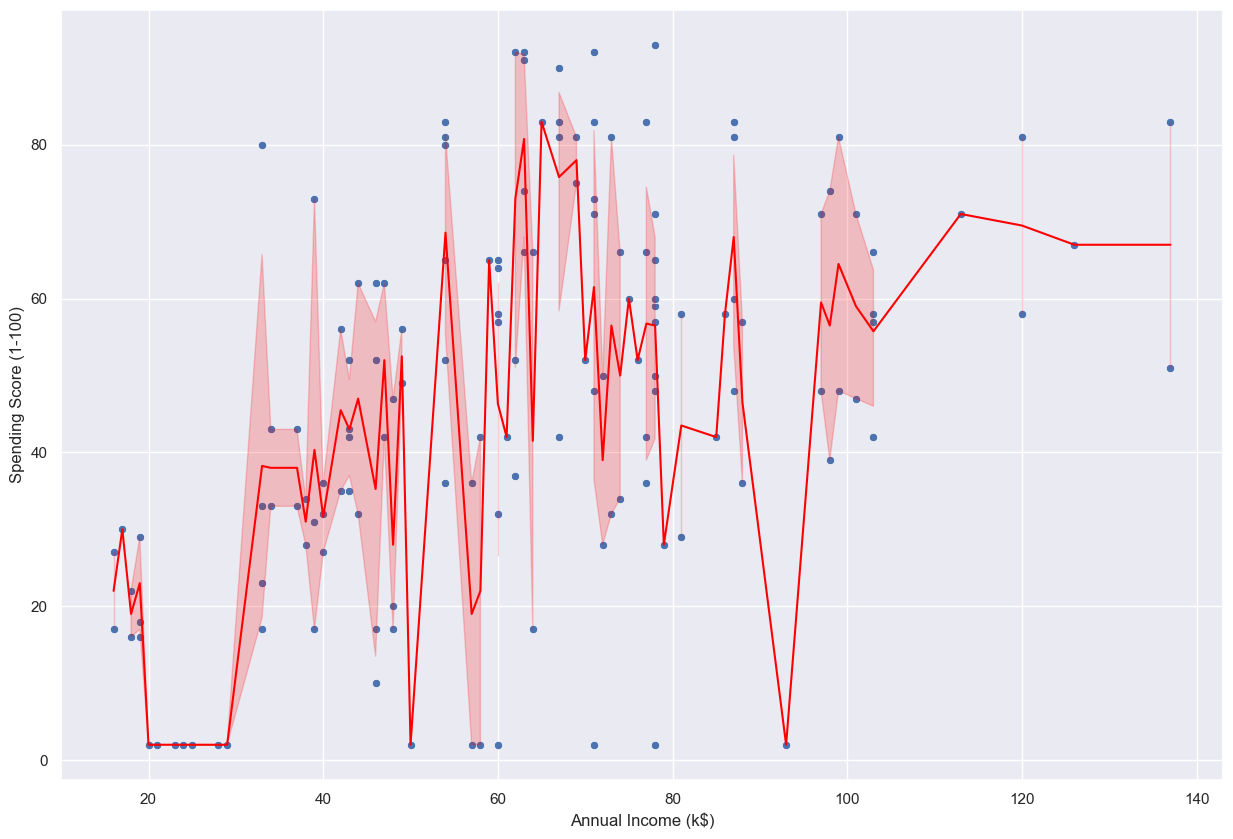

In [78]:
plt.figure(figsize = (15,10))


sns.scatterplot(data = plot_data, x ="Annual Income (k$)", y = "Spending Score (1-100)" )
sns.lineplot(data = plot_data, x ="Annual Income (k$)", y = "Training_Predictions", color = "red")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

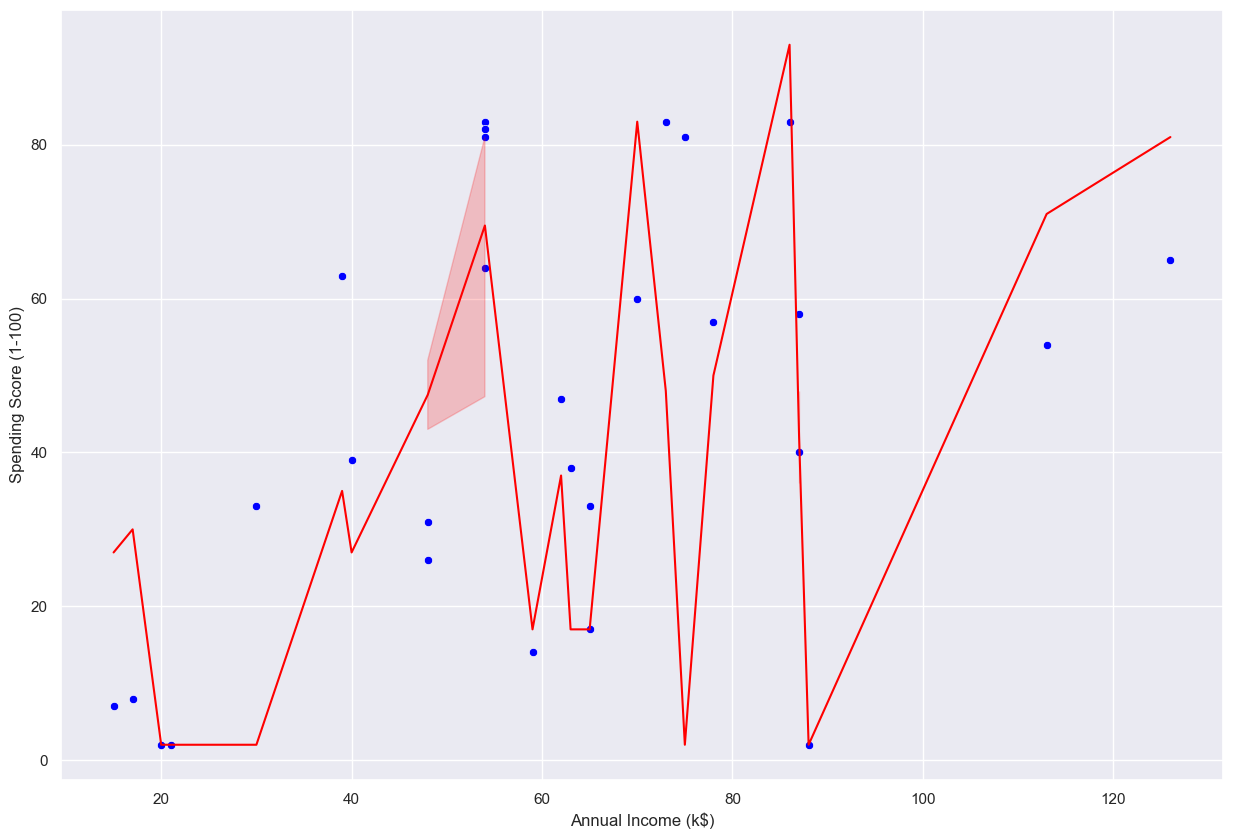

In [79]:
plt.figure(figsize = (15,10))


sns.scatterplot(data = test_plot_data, x="Annual Income (k$)", y = "Spending Score (1-100)", color = "blue" )
sns.lineplot(data = test_plot_data, x ="Annual Income (k$)", y = "Test_Predictions", color = "red")

#### Model 4: Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train.iloc[:, 1:], y_train)

y_pred = rf.predict(x_test.iloc[:, 1:])

In [81]:
rf.score(x_train.iloc[:, 1:], y_train)

0.9294770941616776

### Using Metrics

In [82]:
r2_score(y_test, y_pred)

0.6158930799411185

In [83]:
mean_squared_error(y_test, y_pred)

288.8929877232143

### Tables

In [84]:
pred_vals_df = pd.DataFrame(y_pred, columns = ["Predictions"], index = y_test.index)
pred_vals_df

,Predictions
47,57.4900
78,45.7700
151,34.8400
24,58.7200
83,4.1200
156,50.7500
20,39.1700
0,59.6725
104,26.7000
119,53.0400


In [85]:
combined_result = pd.concat([y_test, pred_vals_df], axis = 1)
combined_result

,Spending Score (1-100),Predictions
47,83,57.4900
78,31,45.7700
151,47,34.8400
24,60,58.7200
83,2,4.1200
156,57,50.7500
20,64,39.1700
0,58,59.6725
104,38,26.7000
119,65,53.0400


In [86]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Using Graphs

In [87]:
y_train_pred = rf.predict(x_train.iloc[:, 1:])
y_test_pred = rf.predict(x_test.iloc[:, 1:])

plot_data = pd.DataFrame({"Training_Predictions": y_train_pred, "Spending Score (1-100)": y_train.values,
             "Annual Income (k$)": x_train["Annual Income (k$)"].values}, index = y_train.index)

test_plot_data = pd.DataFrame({"Test_Predictions": y_test_pred, "Spending Score (1-100)": y_test,
                              "Annual Income (k$)": x_test["Annual Income (k$)"].values}, index = y_test.index)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

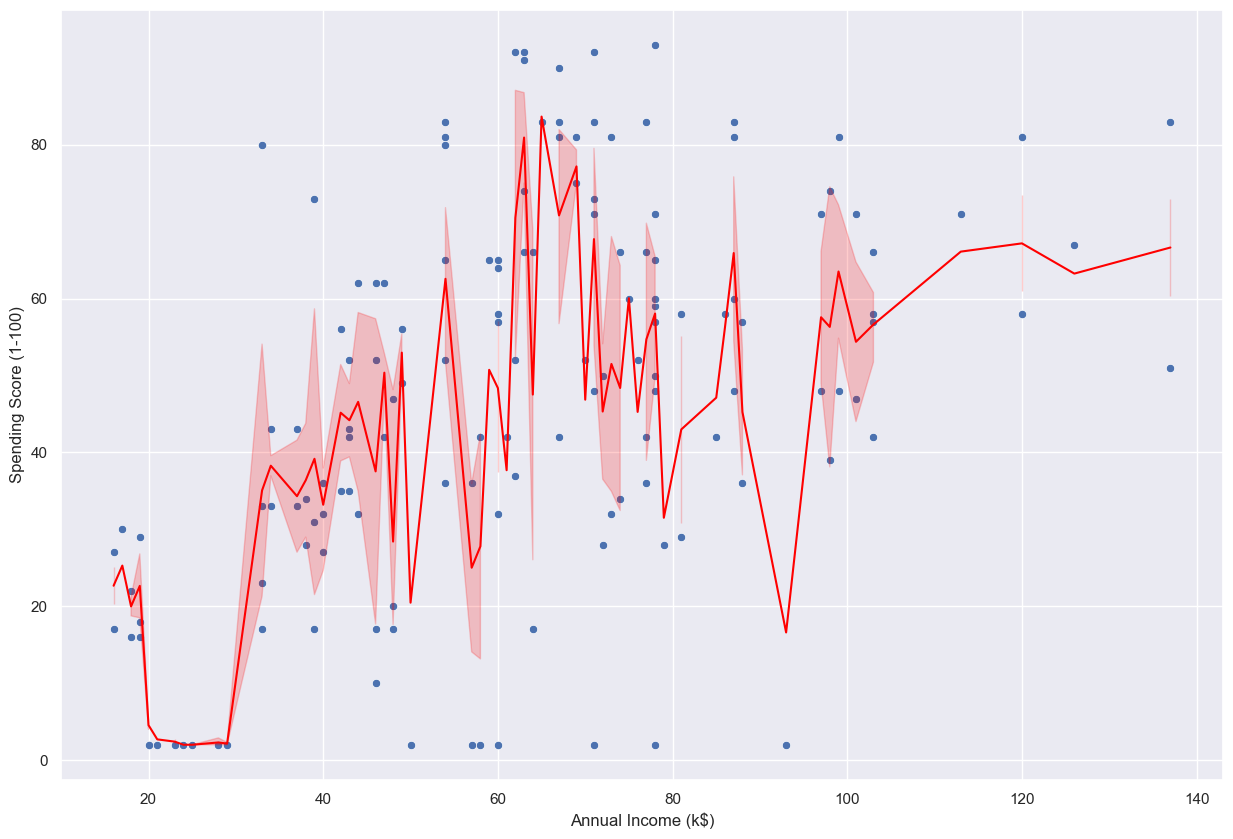

In [88]:
plt.figure(figsize = (15,10))

sns.scatterplot(data = plot_data, x ="Annual Income (k$)", y = "Spending Score (1-100)" )
sns.lineplot(data = plot_data, x ="Annual Income (k$)", y = "Training_Predictions", color = "red")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

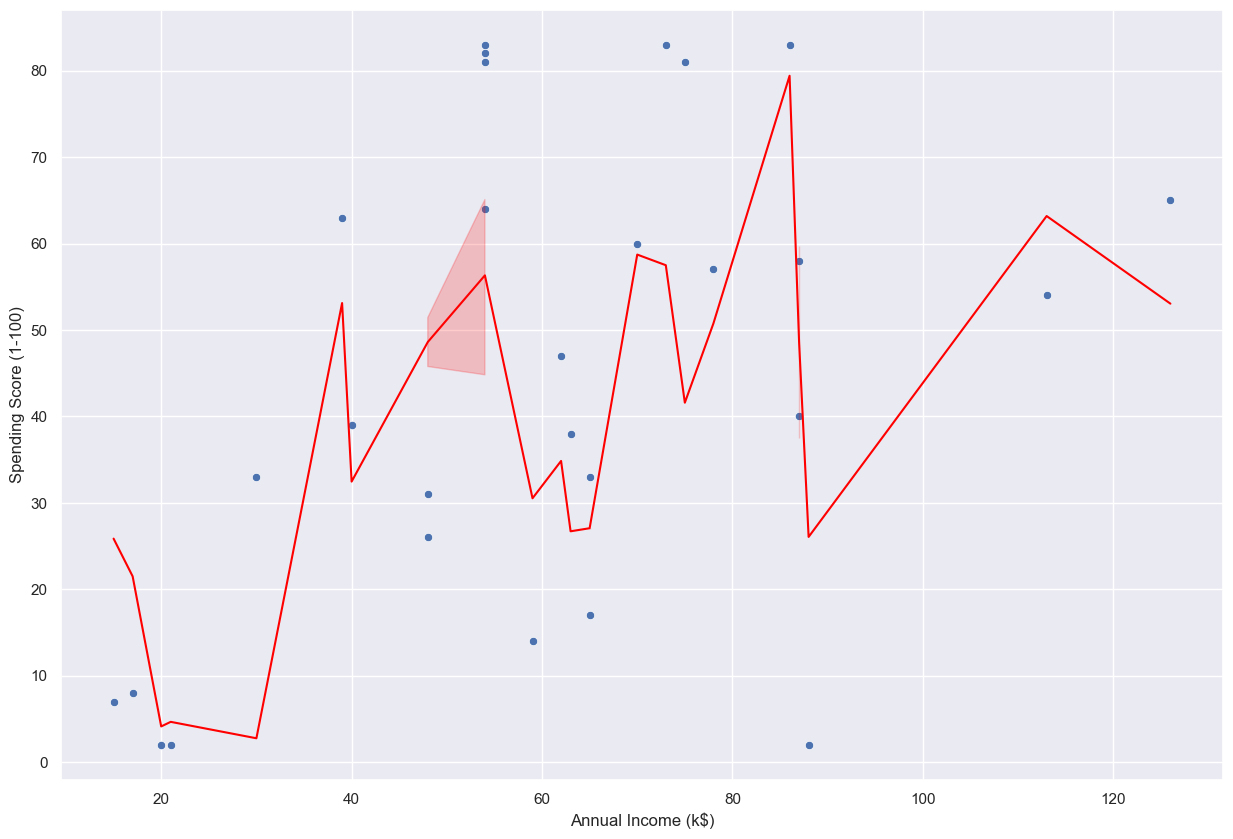

In [89]:
plt.figure(figsize = (15,10))

sns.scatterplot(data = test_plot_data, x ="Annual Income (k$)", y = "Spending Score (1-100)" )
sns.lineplot(data = test_plot_data, x ="Annual Income (k$)", y = "Test_Predictions", color = "red")

In [90]:
rf.feature_importances_

array([0.0325777 , 0.33312716, 0.63429514])

<BarContainer object of 3 artists>

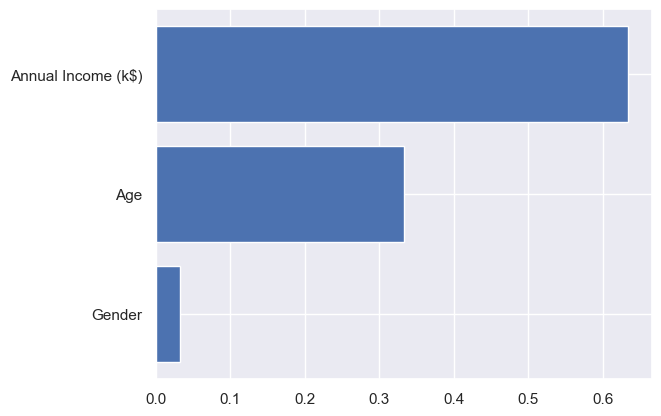

In [91]:
plt.barh(list(x_train.iloc[:, 1:].columns), rf.feature_importances_)

### Underfitting and Overfitting

Before we proceed to using our models to make predictions on previously unseen data, we shall talk about two concepts that we have encountered already without knowing. These are: **Underfitting and Overfitting**


### Overfitting
Overfitting occurs when a model trains so much that it knows the training data too well.

It happens when a machine learning model learns the relationship between the inputs and the output in addition to any "noise" within the training data. Whenever this is the case, the model's performance might seem great on the training data, but very quickly declines when the model is tested against data it has never seen before. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize on new data.

The overfitting problem tends to occur more nonlinear or nonparametric nonparametric models that have more flexibility when learning the relationship between inputs and an output. As such, many implementations of nonparametric machine learning algorithms include parameters that help to limit and constrain how much detail the model learns.

For example, decision trees are a nonparametric machine learning algorithm that are very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up. The pruning is done using the max_depth parameter.

We have already seen an example of overfitting in our decision tree and random forest models. We can simply compare the $r^2$ score or mean_squared_error of the train set to that of the test set. 
> **$r^2 \approx 0.9 \Longrightarrow$ for Train set**

> **$r^2 \approx 0.6 \Longrightarrow$ for Test set**

We see that these metrics give very good results on the train set but not-so-good results on the test set. It is simply because the decision tree model has overfit on the train set




### Underfitting
Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data. We have already seen an example of this in Linear Regression and Support Vector Machines. For the Linear Regression example, 

> **$r^2 \approx 0.4 \Longrightarrow$ for Train set**

> **$r^2 \approx 0.3 \Longrightarrow$ for Test set**

The model itself does not do particularly well with the Train set, talk less of the test set. The simple Linear Regression model is one of the most susceptible models to underfitting and any regression model built strictly with just this algorithm is most likely to underfit. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.


### Assignment


- What are Variance and Bias in Machine Learning?

- What is the Variance-Bias tradeoff?

### Predicting completely new data



From the above, we have created 4 machine learning algorithms which try to predict the spending score and we have tested our machine learning algorithms with the test data created using the **train_test_split.**

Now, the bank is back and would like us to use our algorithms to make predictions about **16 new customers** that just applied to get a loan.

They would like us to **use the machine learning algorithms to predict the spending score of the new customers.**

From our training phase of the Model Building, we determined that the Random Forest Algorithm was the best out of the 4 algorithms. Therefore, it only makes sense that we use it to make the predictions for the new customers

In [92]:
#Importing the new data about the new customers into Jupyter Notebook

new_data = pd.read_excel("new_customers.xlsx")
new_data

,CustomerID,Genre,Age,Annual Income (k$)
0,161,Female,56,79
1,156,Female,27,78
2,165,Male,50,85
3,117,Female,63,65
4,180,Male,35,93
5,144,Female,32,76
6,82,Male,38,54
7,99,Male,48,61
8,14,Female,24,20
9,135,Male,20,73


### Data Issues:


- The Gender column still contains Male and Female

- The Gender column is still spelt "Genre"

#### Solving the Gender issues


- We need to use our LabelEncoder object to categorize the Gender column again as 0s and 1s

- We need to use the .rename() method to rename Genre to Gender


In [93]:
#Using LabelEncoder to categorize the Gender column as 0s and 1s

new_data["Genre"] = le.transform(new_data["Genre"])
new_data.head()

,CustomerID,Genre,Age,Annual Income (k$)
0,161,0,56,79
1,156,0,27,78
2,165,1,50,85
3,117,0,63,65
4,180,1,35,93


In [94]:
#Using the .rename() method to rename Genre to Gender

new_data.rename(columns = {"Genre": "Gender"}, inplace = True)

new_data.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,161,0,56,79
1,156,0,27,78
2,165,1,50,85
3,117,0,63,65
4,180,1,35,93


In [95]:
#Making prediction using our best predictor, the random forest object, rf.

pred_vals = rf.predict(new_data.iloc[:,1:])

In [96]:
#placing our prediction into a datafrome

pred_vals_df = pd.DataFrame(pred_vals, columns = ["Predictions"])
pred_vals_df

,Predictions
0,49.950000
1,36.770000
2,75.710000
3,78.180000
4,61.062333
5,63.190000
6,72.340000
7,23.460000
8,3.950000
9,36.100000


In [97]:
#Importing the actual scores for the new customers

actual_scores = pd.read_excel("new_customers_correct_spending_score.xlsx")

(**Note**: Usually, we do not have access to these actual scores because these are new customers)

In [98]:
#Combining the results of prediction and the actual scores into one dataframe for side-by-side comparison

combined_result = pd.concat([actual_scores, pred_vals_df], axis = 1)

In [99]:
combined_result

,Spending_Score (1-100),Predictions
0,91,49.950000
1,39,36.770000
2,72,75.710000
3,72,78.180000
4,71,61.062333
5,58,63.190000
6,75,72.340000
7,57,23.460000
8,2,3.950000
9,28,36.100000


### Improving the prediction accuracy

#### 1. Feature Engineering


This is the process of changing a column or creating newer columns that the machine learning algorithm can always work with to produce more accurate results.

**I. Using Clusters:**
One way of performing Feature Engineering discussed below, is to find clusters within the dataset. These clusters are identified using the K-Means clustering algorithm. These clusters would give extra bit of information about the data that was probably not obvious to the Machine Learning algorithms. Although, the chances are Decision Trees and Random Forests have already discovered these clusters during their decision making process.


**II. Using PCA and LDA:**
Another way that Feature Engineering is done is to perform Principal Component Analysis and Linear Discriminant Analysis on the dataset. These would generate newer condensed columns which represent the datapoints which give the largest variance observed within the dataset.

#### 2. Hyperparameter Tuning

This is the process of tuning or toggling the values of the arguments given with each Machine Learning algorithm in order to improve its results.
An example is using the max_depth parameter to prune a Decision Tree; an idea we shall explore later in this notebook.

#### Creating a new column using Clustering:

The idea here is to create a clustering algorithm that asks the algorithm to learn from the dataset without the output column.

It takes the customer_data  without the spending score column and then learns how the input columns of the customer_data dataset interact before proceeding to cluster the dataset.

Each cluster has something in common that the clustering algorithm has noticed.

Based on this new clusters, we can create a new column called customer type (cust_type) to aid our machine learning algorithms.

In [100]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

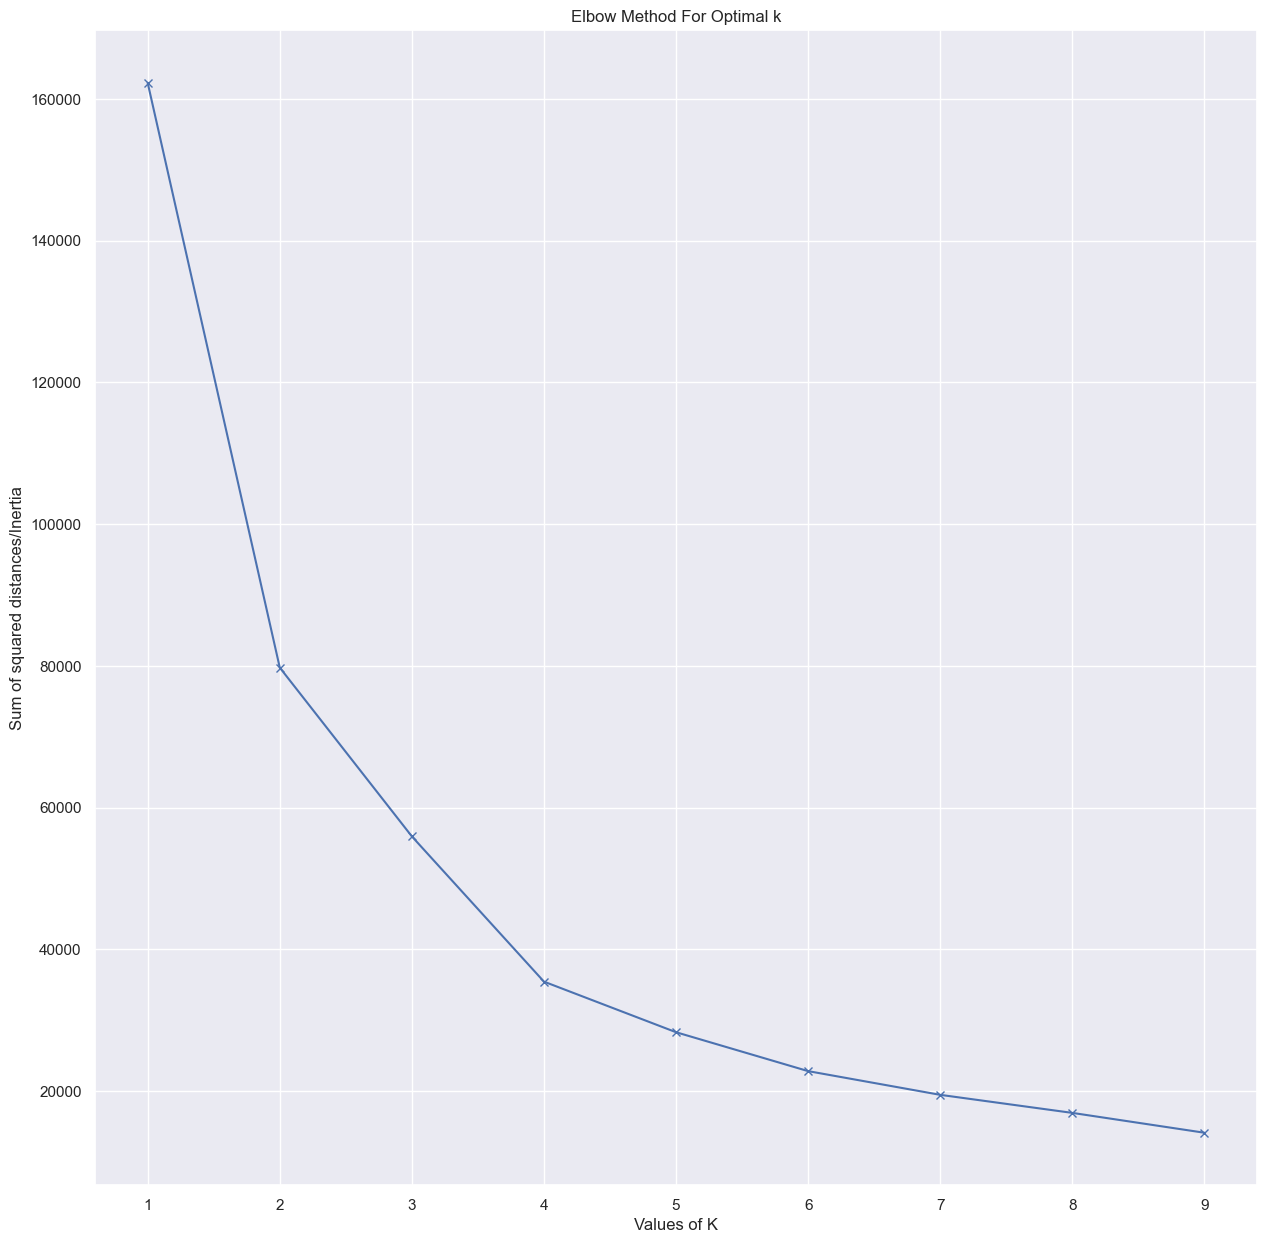

In [101]:
#Importing the kmeans clustering algorithm
from sklearn.cluster import KMeans


Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(customer_data.iloc[:, 1:-1])
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize = (15,15))
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

The above method of finding the optimal clusters to use is called the Elbow method.

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://stackabuse.com/k-means-clustering-with-the-elbow-method/

In [102]:
#Placing all the column values into a list
features=['Age', 'Gender', 'Annual Income (k$)']

#Creating a kmeans cluster of 4 clusters
kmeans = KMeans(n_clusters=4)

#Using the kmeans clustering algorithm to fit on the customer_data features or input columns
kmeans.fit(customer_data[features])


#Creating a new column by predicting the value of the cluster each data point belongs to.
customer_data['cust_type'] = kmeans.predict(customer_data[features])


#Creating the same column for our new customers dataset
new_data["cust_type"] = kmeans.predict(new_data[features])

In [103]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cust_type
0,170,1,32.0,87,58,1
1,174,1,36.0,87,60,1
2,113,0,38.0,64,66,1
3,150,1,34.0,78,60,1
4,68,0,68.0,48,47,0
...,...,...,...,...,...,...
181,193,1,33.0,113,71,3
182,151,1,43.0,78,93,1
183,30,0,23.0,29,2,2
184,88,0,22.0,57,36,1


**Observation**:

Observe that the last column is no longer Spending Score but cust_type. We need to rearrange the columns to make Spending Score the last column.

Next, we need to reperform the train_test_split step because we have added a new column to the dataset

In [104]:
customer_data = customer_data[["CustomerID", "Gender", "Age", "Annual Income (k$)", "cust_type", "Spending Score (1-100)"]]

new_data = new_data[["CustomerID", "Gender", "Age", "Annual Income (k$)", "cust_type"]]

In [105]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),cust_type,Spending Score (1-100)
0,170,1,32.0,87,1,58
1,174,1,36.0,87,1,60
2,113,0,38.0,64,1,66
3,150,1,34.0,78,1,60
4,68,0,68.0,48,0,47
...,...,...,...,...,...,...
181,193,1,33.0,113,3,71
182,151,1,43.0,78,1,93
183,30,0,23.0,29,2,2
184,88,0,22.0,57,1,36


**Performing train_test_split again**

In [106]:
X = customer_data.iloc[:,0:-1]

Y = customer_data.iloc[:, -1]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = X["Gender"], test_size = 0.15)

### Linear Regression

In [108]:
lr = LinearRegression()

lr.fit(x_train.iloc[:, 1:], y_train)

y_pred = lr.predict(x_test.iloc[:, 1:])

lr.score(x_train.iloc[:, 1:], y_train)

0.4633705298486156

In [109]:
r2_score(y_test, y_pred)

0.32752571741754866

In [110]:
mean_squared_error(y_test, y_pred)

415.131927053536

In [111]:
pred_vals = lr.predict(new_data.iloc[:,1:])

pred_vals_df = pd.DataFrame(pred_vals, columns = ["Predictions"])
pred_vals_df

,Predictions
0,63.810886
1,56.003862
2,65.140795
3,67.904776
4,44.052413
5,55.975500
6,53.779011
7,60.681553
8,7.347985
9,50.127114


In [112]:
combined_result = pd.concat([actual_scores, pred_vals_df], axis = 1)
combined_result

,Spending_Score (1-100),Predictions
0,91,63.810886
1,39,56.003862
2,72,65.140795
3,72,67.904776
4,71,44.052413
5,58,55.975500
6,75,53.779011
7,57,60.681553
8,2,7.347985
9,28,50.127114


### Support Vector Machine

**Regularization parameter (C):**

1. The C parameter in SVM is mainly used for the Penalty parameter of the error term.

2. You can consider it as the degree of correct classification that the algorithm has to meet or the degree of optimization the SVM has to meet.

3. Controls the tradeoff between the classification of training points accurately and a smooth decision boundary or in a simple word, it suggests the model choose data points as a support vector.

3. For large C – then model choose more data points as a support vector and we get the higher variance and lower bias, which may lead to the problem of overfitting.

**Gamma Parameter:**  

1. Gamma is used when we use the Gaussian RBF kernel.

2. If you use linear or polynomial kernel then you do not need gamma only you need C hypermeter.

3. It decides that how much curvature we want in a decision boundary.

4. High Gamma value – More curvature

5. Low Gamma value – Less curvature

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR

In [113]:
#svr = SVR(kernel = "rbf")
#svr = SVR(kernel = "rbf", C = 10.0)
#svr = SVR(kernel = "rbf", C = 12.0)
svr = SVR(kernel = "rbf", C = 20.0)
#svr = SVR(kernel = "rbf", C = 30.0)
#svr = SVR(kernel = "rbf", C = 40.0)
#gamma = ["scale", "auto"]

#svr = SVR(kernel = "rbf", C = 12.0)

svr.fit(x_train.iloc[:, 1:], y_train)

y_pred = svr.predict(x_test.iloc[:, 1:])

svr.score(x_train.iloc[:, 1:], y_train)

0.45721534679458253

In [114]:
r2_score(y_test, y_pred)

0.3705598607441549

In [115]:
mean_squared_error(y_test, y_pred)

388.56608310829677

In [116]:
pred_vals = svr.predict(new_data.iloc[:,1:])

pred_vals_df = pd.DataFrame(pred_vals, columns = ["Predictions"])
pred_vals_df

,Predictions
0,78.540574
1,49.988121
2,75.100059
3,75.381271
4,59.172992
5,56.600727
6,51.678388
7,66.788245
8,9.682104
9,39.353086


In [117]:
combined_result = pd.concat([actual_scores, pred_vals_df], axis = 1)
combined_result

,Spending_Score (1-100),Predictions
0,91,78.540574
1,39,49.988121
2,72,75.100059
3,72,75.381271
4,71,59.172992
5,58,56.600727
6,75,51.678388
7,57,66.788245
8,2,9.682104
9,28,39.353086


### Decision Trees

In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dt = DecisionTreeRegressor(max_depth = 3, max_features = "auto")

dt.fit(x_train.iloc[:, 1:], y_train)

y_pred = dt.predict(x_test.iloc[:, 1:])

dt.score(x_train.iloc[:, 1:], y_train)

0.5576188184957895

In [119]:
r2_score(y_test, y_pred)

0.41755982759362764

In [120]:
mean_squared_error(y_test, y_pred)

359.55205637890776

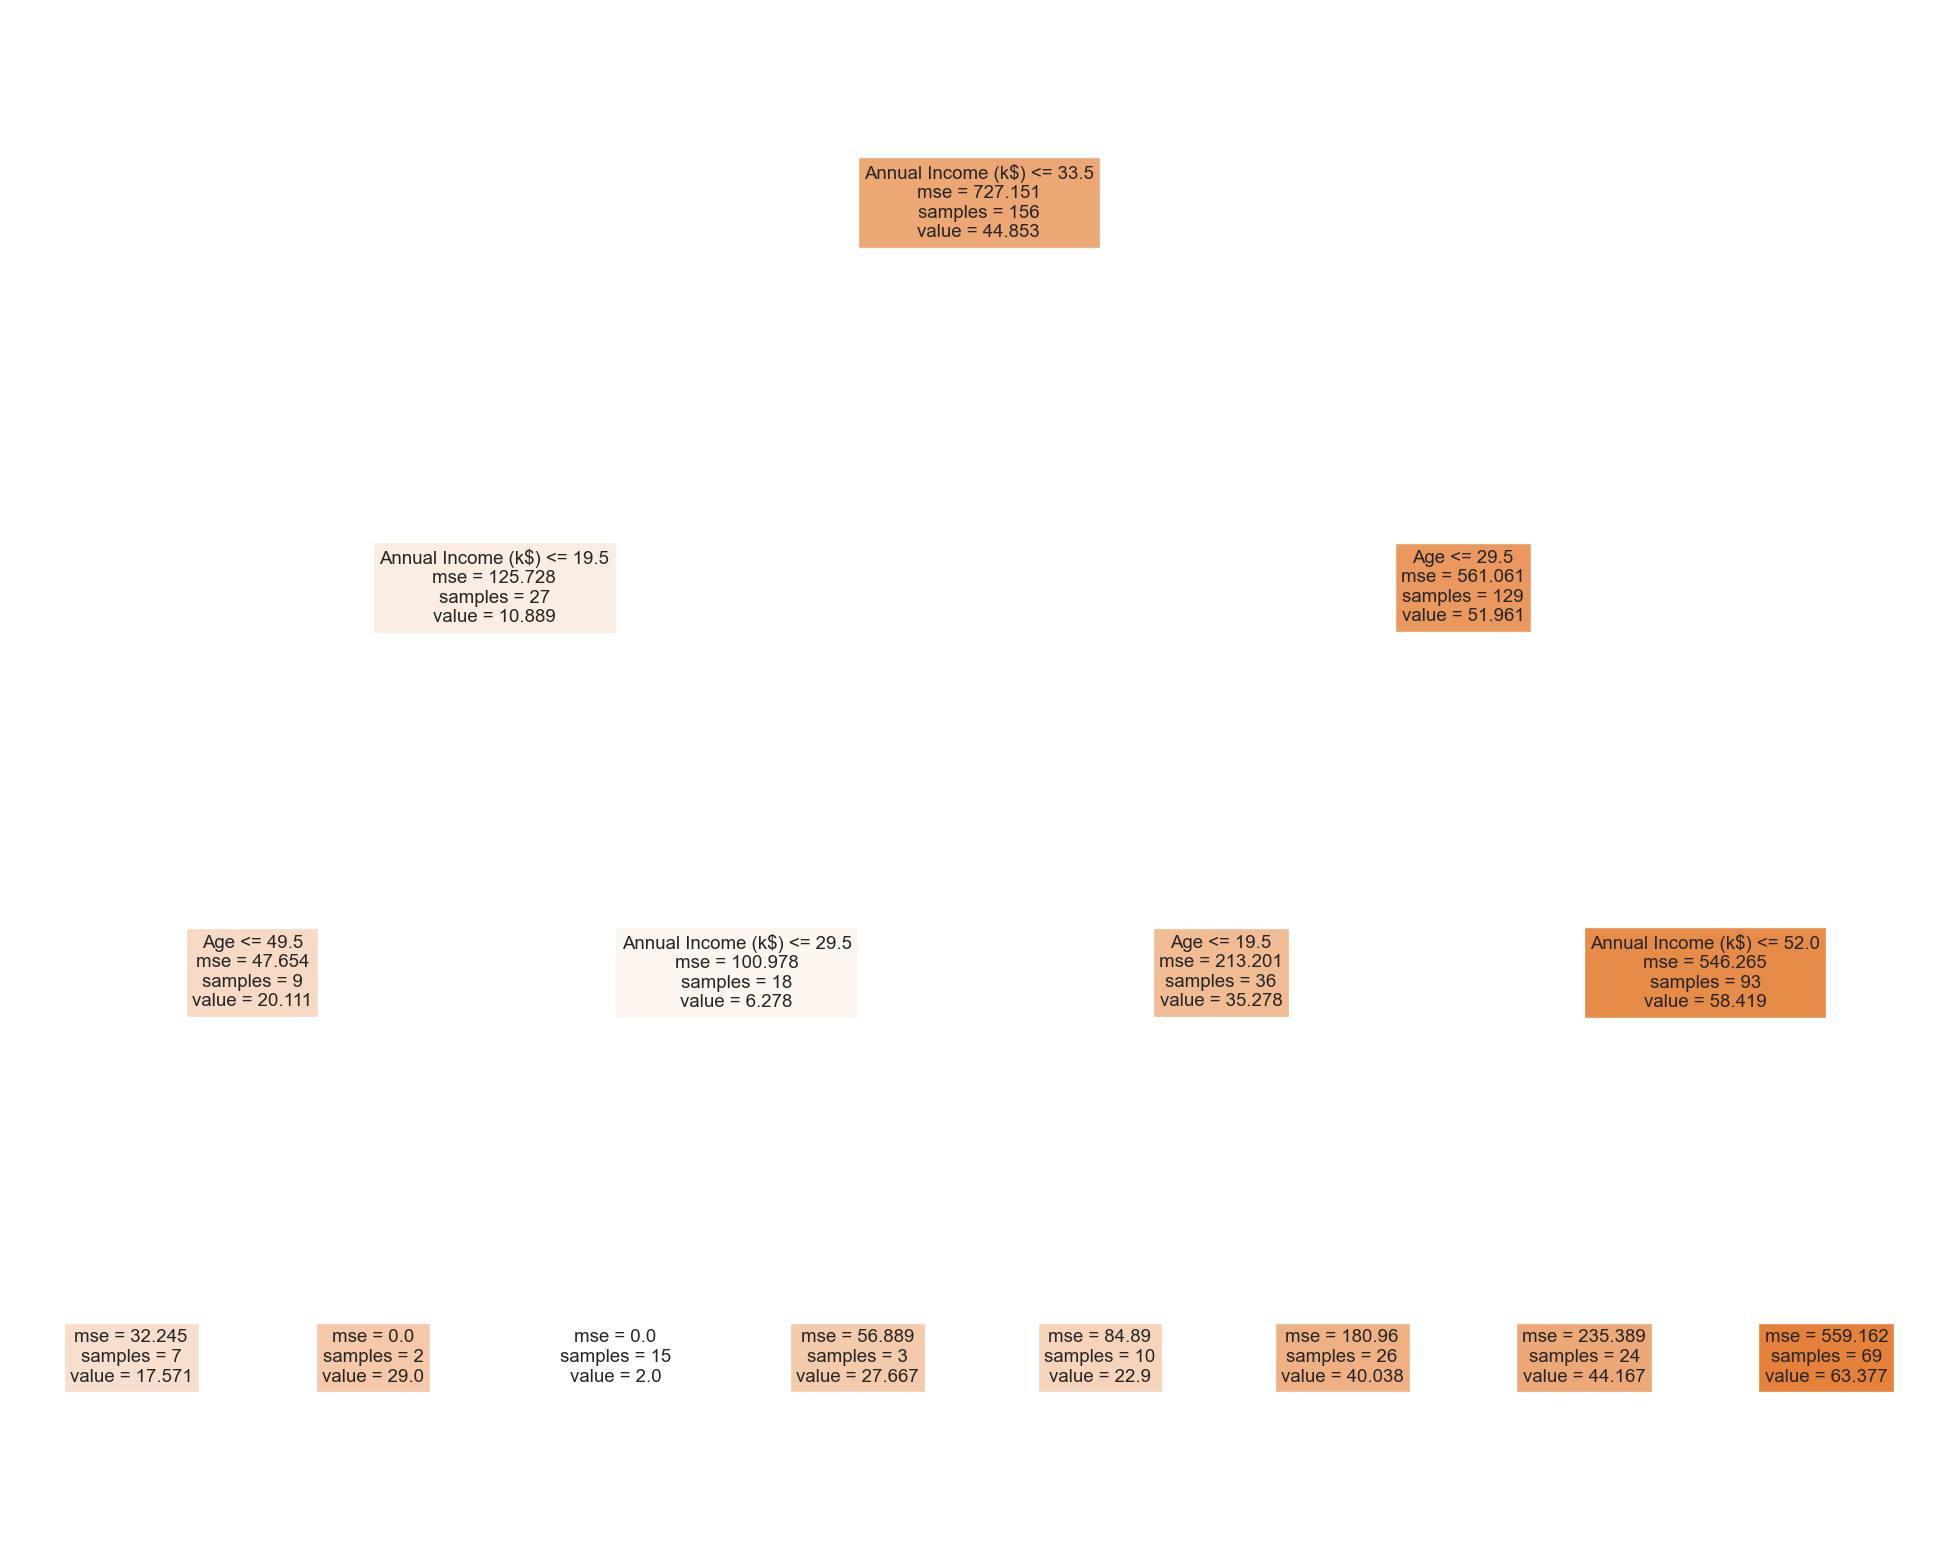

In [121]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names= X.iloc[:,1:].columns,  
                   class_names= Y.name,
                   filled=True)

In [122]:
pred_vals = dt.predict(new_data.iloc[:,1:])

pred_vals_df = pd.DataFrame(pred_vals, columns = ["Predictions"])
pred_vals_df

,Predictions
0,63.376812
1,40.038462
2,63.376812
3,63.376812
4,63.376812
5,63.376812
6,63.376812
7,63.376812
8,2.000000
9,40.038462


In [123]:
combined_result = pd.concat([actual_scores, pred_vals_df], axis = 1)
combined_result

,Spending_Score (1-100),Predictions
0,91,63.376812
1,39,40.038462
2,72,63.376812
3,72,63.376812
4,71,63.376812
5,58,63.376812
6,75,63.376812
7,57,63.376812
8,2,2.000000
9,28,40.038462


### Random Forest

In [124]:
#rf = RandomForestRegressor(n_estimators = 125, max_depth = 10, max_features = "auto")

rf = RandomForestRegressor(n_estimators = 125, max_depth = 10, max_features = "auto", random_state = 0)

rf.fit(x_train.iloc[:, 1:], y_train)

y_pred = rf.predict(x_test.iloc[:, 1:])

rf.score(x_train.iloc[:, 1:], y_train)

0.9243031782875244

In [125]:
r2_score(y_test, y_pred)

0.4850241967427543

In [126]:
mean_squared_error(y_test, y_pred)

317.90494168959

In [127]:
pred_vals = rf.predict(new_data.iloc[:,1:])

pred_vals_df = pd.DataFrame(pred_vals, columns = ["Predictions"])
pred_vals_df

,Predictions
0,32.628424
1,40.102880
2,71.958029
3,74.564997
4,57.941654
5,60.660244
6,72.758000
7,33.798081
8,5.712000
9,35.765333


In [128]:
combined_result = pd.concat([actual_scores, pred_vals_df], axis = 1)
combined_result

,Spending_Score (1-100),Predictions
0,91,32.628424
1,39,40.102880
2,72,71.958029
3,72,74.564997
4,71,57.941654
5,58,60.660244
6,75,72.758000
7,57,33.798081
8,2,5.712000
9,28,35.765333


<BarContainer object of 4 artists>

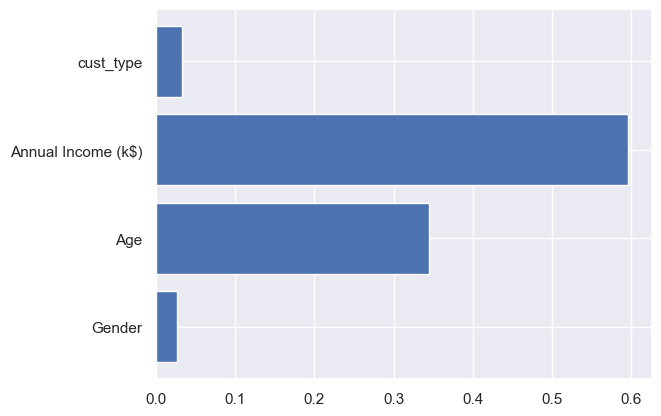

In [129]:
plt.barh(list(x_train.iloc[:, 1:].columns), rf.feature_importances_)

### Homework


Watch the followgin videos. You will give a brief explanation of the concepts learning in the vldeo:


**Normal Distribution**: https://www.youtube.com/watch?v=RKdB1d5-OE0 **and** https://www.youtube.com/watch?v=rzFX5NWojp0&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=3

**Regression**: https://www.youtube.com/watch?v=aq8VU5KLmkY&t=1s

**Kmeans Clustering**: https://stackabuse.com/k-means-clustering-with-the-elbow-method/

**Overfitting and Underfitting**: https://www.youtube.com/watch?v=EuBBz3bI-aA